# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Data Dictionary

## loading all the libraries required for the project
- pandas - for data analysis
- numpy - for data analysis
- matplotlib - for data analysis
- seaborn - for data analysis

In [42]:
# importing the libraries that are needed for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt # for plotting graphs 
import seaborn as sns # for plotting graphs
import missingno as msno # for plotting missing values

# Loading the dataset

In [49]:
# loading the dataset (Bike sharing data)
bike_data=pd.read_csv('SeoulBikeData.csv') # reading the data from the csv file


In [8]:
bike_data.head() # to see the first 5 rows of the data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
bike_data.tail() # to see the last 5 rows of the data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
bike_data.info() # to see the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [24]:
bike_data.shape # to see the shape of the data

(8760, 14)

In [48]:
bike_data.describe().T # to see the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(�C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(�C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [12]:
bike_data.isna().sum() # to see the number of missing values in each column

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# No NAN Values!!!
- As there are no NAN values in the dataset, But also we can't use the dataset as it is.
- Suppose that there might be missing data entered as ? or given value as 0, then we can't use the dataset as it is.
- So let’s try finding the values like 0 and ‘?’ replace them with sensitive values which make sense
- 0 can be considered as a missing value depending on the context or domain knowledge.


In [156]:
def print_missing_values(df,value):
    '''
    1st argument: dataframe
    2nd argument: value
    This function returns count of the rows in the dataframe which contains the 'value' i.e the second argument

    '''
    return pd.DataFrame(({"Rows":(df==value).sum(),"% of occurance":(df==value).sum()
    /df.shape[0]*100})).sort_values(ascending=False,by="% of occurance")
    # return pd.DataFrame((df[cols]==value).sum())



In [157]:
# to see the number of missing values in each column with the value "?"
print_missing_values(bike_data,"?")

,Rows,% of occurance
Date,0,0.0
Rented Bike Count,0,0.0
Hour,0,0.0
Temperature(�C),0,0.0
Humidity(%),0,0.0
Wind speed (m/s),0,0.0
Visibility (10m),0,0.0
Dew point temperature(�C),0,0.0
Solar Radiation (MJ/m2),0,0.0
Rainfall(mm),0,0.0


In [158]:
# to see the number of missing values in each column with the value 0
print_missing_values(bike_data,0)


,Rows,% of occurance
Snowfall (cm),8317,94.942922
Rainfall(mm),8232,93.972603
Solar Radiation (MJ/m2),4300,49.086758
Hour,365,4.166667
Rented Bike Count,295,3.367580
Wind speed (m/s),74,0.844749
Dew point temperature(�C),60,0.684932
Temperature(�C),21,0.239726
Humidity(%),17,0.194064
Date,0,0.000000


## The zero values is present in all the rows. 
- Before accepting the zero as real values we need to analyse each columns through the domain knowledge.
- So we need to check the data and remove the rows or columns with zero values. depending upon the dataset

In [115]:
# lets start with snowfall data
bike_data['Snowfall (cm)'].value_counts() # to see the number of occurance of each value in the column

0.0    8317
0.3      42
1.0      39
0.5      34
0.9      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
1.3       4
4.0       4
3.2       4
4.1       4
2.4       3
1.1       3
3.7       3
3.8       3
2.1       3
2.3       3
3.3       3
1.9       3
1.7       3
4.8       2
0.1       2
2.8       2
8.8       2
3.4       2
4.3       2
3.9       2
5.0       2
2.9       2
1.4       2
7.1       1
7.0       1
3.6       1
3.1       1
5.1       1
6.0       1
4.2       1
1.5       1
Name: Snowfall (cm), dtype: int64

- You can see that 0 is present in most of the rows i.e approx (94%) of the data
- So according to the domain knowledge we can accept the zero values

In [159]:
missing_values_columns=list(bike_data.columns)# to get the list of columns
missing_values_columns.remove('Snowfall (cm)') # removing the column from the list
missing_values_columns # to see the column which is popped

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [160]:
# Coming the second column
print_missing_values(bike_data.loc[:,missing_values_columns],0)

,Rows,% of occurance
Rainfall(mm),8232,93.972603
Solar Radiation (MJ/m2),4300,49.086758
Hour,365,4.166667
Rented Bike Count,295,3.367580
Wind speed (m/s),74,0.844749
Dew point temperature(�C),60,0.684932
Temperature(�C),21,0.239726
Humidity(%),17,0.194064
Date,0,0.000000
Visibility (10m),0,0.000000


In [50]:
bike_data.head() # to see the first 5 rows of the data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
(bike_data[missing_values_columns]=="0").sum()

<AxesSubplot:>

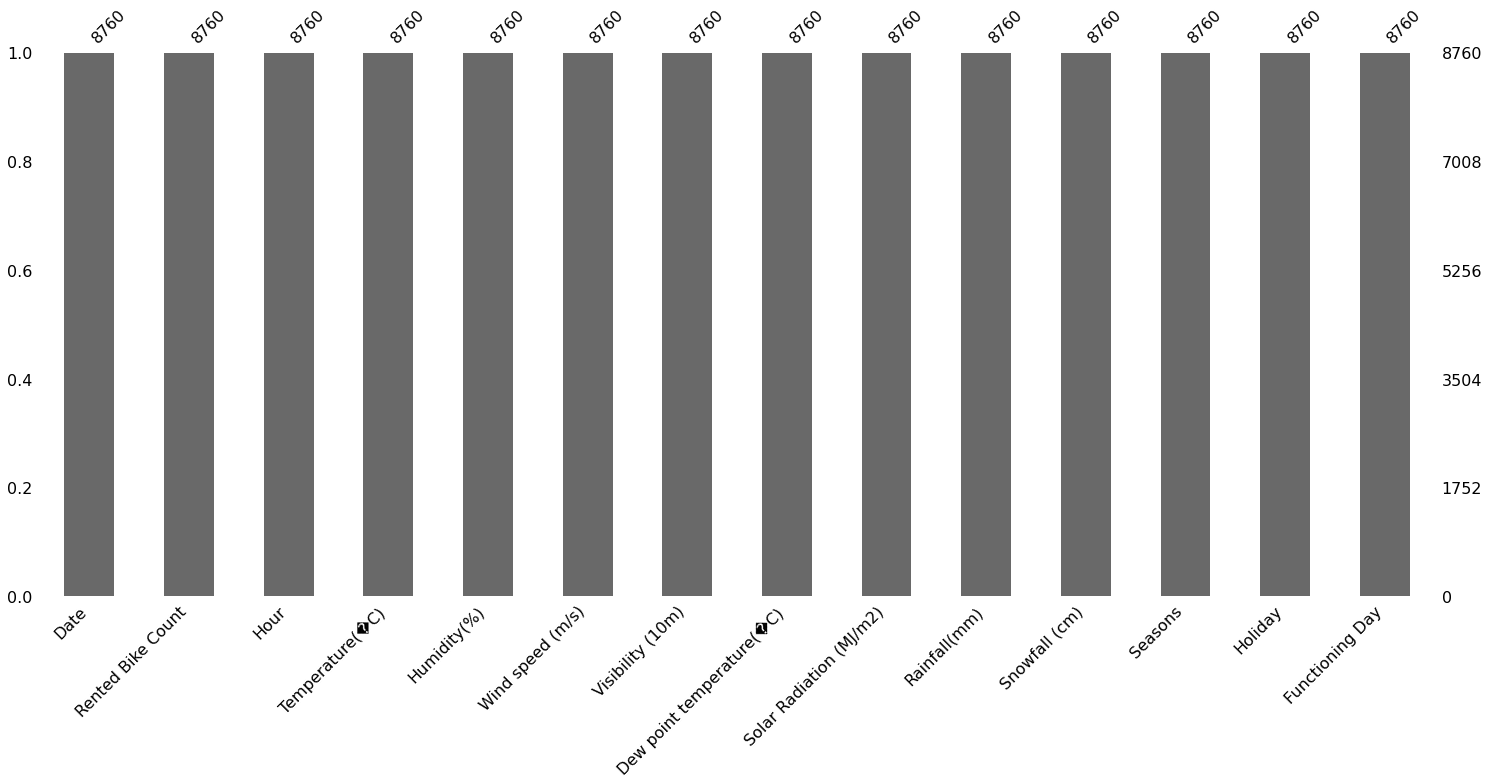

In [45]:
msno.bar(bike_data) # to see the missing values in the data